In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [42]:
import os
os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async"
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"

In [43]:
import kagglehub
path=kagglehub.dataset_download("rupakroy/lstm-datasets-multivariate-univariate")
print("Path to dataset files:",path)

Path to dataset files: /kaggle/input/lstm-datasets-multivariate-univariate


In [44]:
import numpy as np
import pandas as pd
train_data=pd.read_csv("/kaggle/input/lstm-datasets-multivariate-univariate/LSTM-Multivariate_pollution.csv")
test_data=pd.read_csv("/kaggle/input/lstm-datasets-multivariate-univariate/pollution_test_data1.csv")

In [45]:
#Viewing the first few entries of the data
train_data.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [46]:
train_data.tail()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43799,2014-12-31 23:00:00,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [47]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
pollution,43800.0,94.013516,92.252276,0.00,24.00,68.00,132.25,994.0
dew,43800.0,1.828516,14.429326,-40.00,-10.00,2.00,15.00,28.0
temp,43800.0,12.459041,12.193384,-19.00,2.00,14.00,23.00,42.0
press,43800.0,1016.447306,10.271411,991.00,1008.00,1016.00,1025.00,1046.0
wnd_spd,43800.0,23.894307,50.022729,0.45,1.79,5.37,21.91,585.6
snow,43800.0,0.052763,0.760582,0.00,0.00,0.00,0.00,27.0
rain,43800.0,0.195023,1.416247,0.00,0.00,0.00,0.00,36.0


In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB


In [49]:
train_data.isnull().sum()

date         0
pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

In [50]:
train_data=train_data.drop(columns=['date'])

In [51]:
train_data.isna().sum()

pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

In [52]:
train_data["wnd_dir"].value_counts()

wnd_dir
SE    15290
NW    14130
cv     9384
NE     4996
Name: count, dtype: int64

In [53]:
test_data.head()

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,pollution
0,-16,4,1027,SE,3.58,0,0,128
1,-17,5,1027,SE,7.60,0,0,77
2,-16,4,1027,SE,9.39,0,0,65
3,-16,1,1028,cv,0.89,0,0,79
4,-14,0,1028,NE,1.79,0,0,93


In [54]:
test_data.tail()

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,pollution
341,-23,-2,1034,NW,231.97,0,0,8
342,-22,-3,1034,NW,237.78,0,0,10
343,-22,-3,1034,NW,242.70,0,0,10
344,-22,-4,1034,NW,246.72,0,0,8
345,-21,-3,1034,NW,249.85,0,0,12


In [55]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
dew,346.0,-13.878613,4.029925,-27.00,-16.00,-14.000,-11.0000,-6.00
temp,346.0,-0.653179,4.548732,-9.00,-4.00,-1.500,2.0000,11.00
press,346.0,1026.083815,5.996272,1011.00,1022.00,1027.000,1031.0000,1035.00
wnd_spd,346.0,62.473815,107.500012,0.45,2.67,7.825,58.7825,441.18
snow,346.0,0.000000,0.000000,0.00,0.00,0.000,0.0000,0.00
rain,346.0,0.000000,0.000000,0.00,0.00,0.000,0.0000,0.00
pollution,346.0,96.398844,98.298524,0.00,14.00,63.500,157.5000,444.00


In [56]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dew        346 non-null    int64  
 1   temp       346 non-null    int64  
 2   press      346 non-null    int64  
 3   wnd_dir    346 non-null    object 
 4   wnd_spd    346 non-null    float64
 5   snow       346 non-null    int64  
 6   rain       346 non-null    int64  
 7   pollution  346 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 21.8+ KB


In [57]:
test_data.isnull().sum()

dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
pollution    0
dtype: int64

In [58]:
test_data.isna().sum()

dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
pollution    0
dtype: int64

In [59]:
test_data["wnd_dir"].value_counts()

wnd_dir
NW    206
cv     72
SE     34
NE     34
Name: count, dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_data['wnd_dir']=label_encoder.fit_transform(train_data['wnd_dir'])
test_data['wnd_dir']=label_encoder.transform(test_data['wnd_dir'])

In [61]:
features=['dew','temp','press','wnd_dir','wnd_spd','snow','rain']
target='pollution'

In [62]:
X=train_data[features].values
y=train_data[target].values.reshape(-1,1)
X_test=test_data[features].values
y_test=test_data[target].values.reshape(-1,1)

In [63]:
from sklearn.preprocessing import MinMaxScaler
X_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

X_scaled=X_scaler.fit_transform(X)
y_scaled=y_scaler.fit_transform(y)

X_test_scaled=X_scaler.transform(X_test)
y_test_scaled=y_scaler.transform(y_test)

In [64]:
def create_sequences(X,y,time_steps):
    Xs,ys=[],[]
    for i in range(time_steps,len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs),np.array(ys)

In [65]:
time_steps=24
X_seq,y_seq=create_sequences(X_scaled,y_scaled,time_steps)
X_test_seq,y_test_seq=create_sequences(X_test_scaled,y_test_scaled,time_steps)

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_seq,y_seq,test_size=0.1,random_state=42,shuffle=False)

In [67]:
from tensorflow.keras import layers, models

model=models.Sequential([
    layers.Bidirectional(layers.LSTM(units=256,activation='tanh',return_sequences=True),input_shape=(time_steps,X_train.shape[2])),
    layers.Dropout(rate=0.3),
    layers.Bidirectional(layers.LSTM(units=128,activation='tanh',return_sequences=True)),
    layers.Dropout(rate=0.3),
    layers.Bidirectional(layers.LSTM(units=64,activation='tanh')),
    layers.Dropout(rate=0.3),
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional) │ (None, 24, 512)        │       540,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 24, 256)        │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 24, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,369,729 (5.23 MB)

 Trainable params: 1,369,729 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

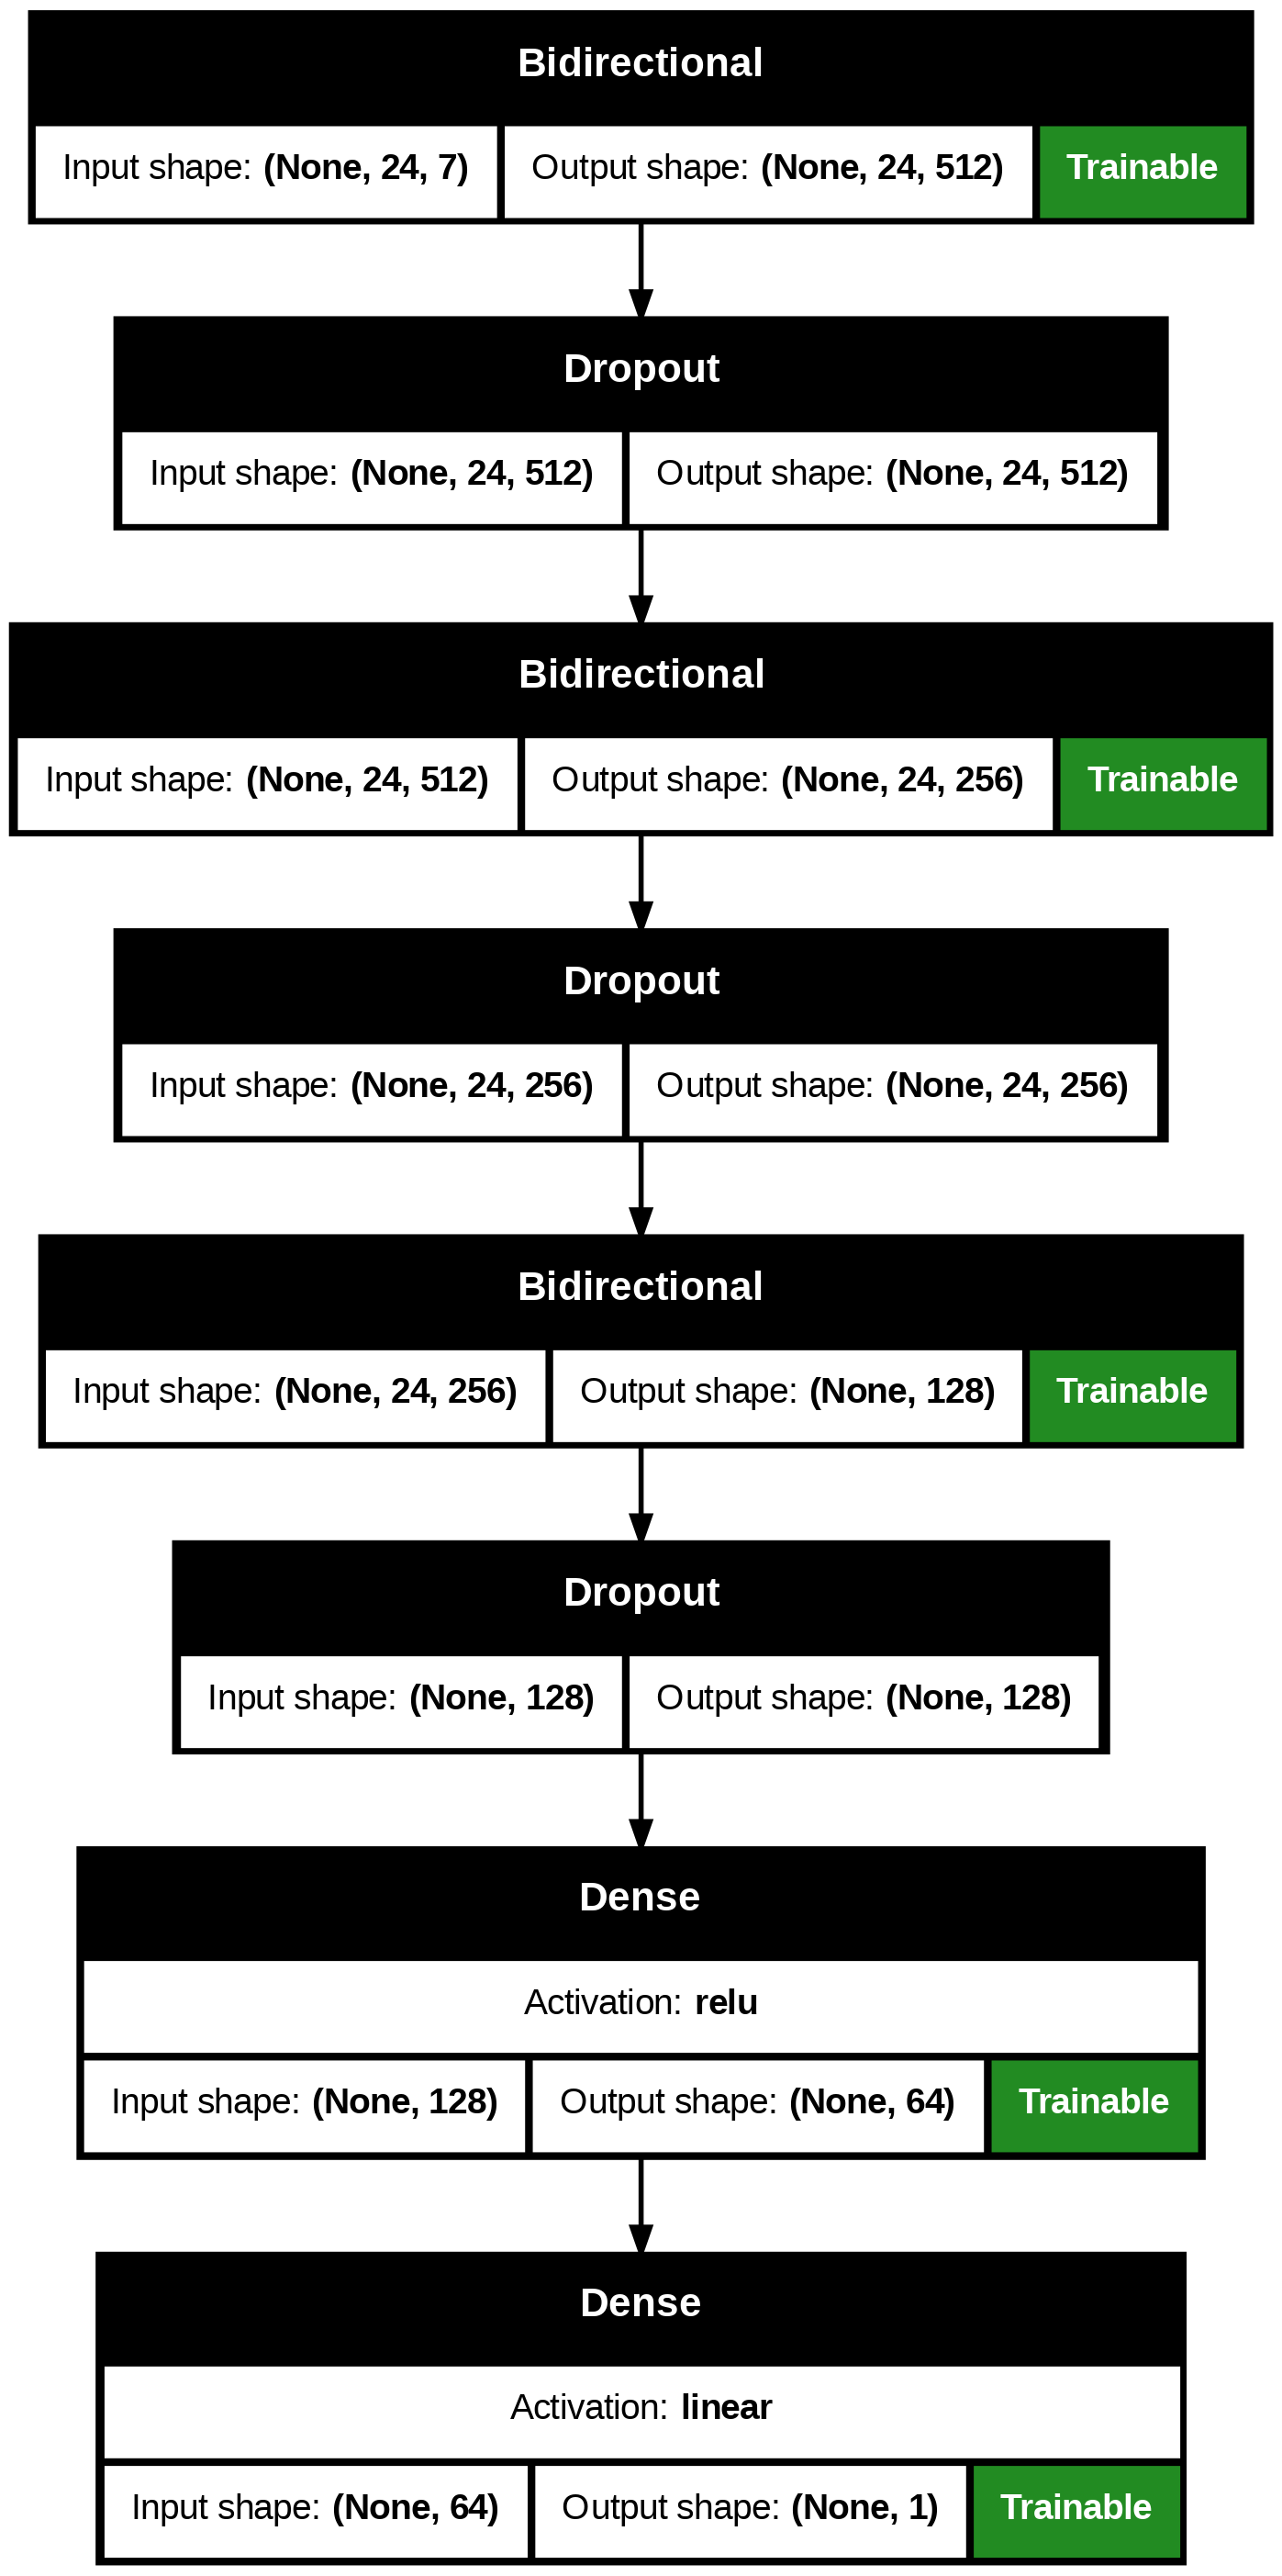

In [69]:
import tensorflow as tf
tf.keras.utils.plot_model(model,dpi=200,show_trainable=True,show_layer_activations=True,show_shapes=True)

In [70]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='huber',metrics=['mae'])

In [71]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
early_stopper=EarlyStopping(patience=5,restore_best_weights=True,monitor='val_loss')
lr_scheduler=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,min_lr=1e-6)
model_check=ModelCheckpoint('best_model_lstm.h5',save_best_only=True,monitor='val_loss')

In [72]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50,batch_size=64,verbose=1,callbacks=[early_stopper,model_check,lr_scheduler])

Epoch 1/50
614/616 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0040 - mae: 0.0617

616/616 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 0.0040 - mae: 0.0617 - val_loss: 0.0020 - val_mae: 0.0444 - learning_rate: 0.0010
Epoch 2/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0027 - mae: 0.0495 - val_loss: 0.0020 - val_mae: 0.0440 - learning_rate: 0.0010
Epoch 3/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0025 - mae: 0.0471

616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0025 - mae: 0.0471 - val_loss: 0.0019 - val_mae: 0.0410 - learning_rate: 0.0010
Epoch 4/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0024 - mae: 0.0463 - val_loss: 0.0020 - val_mae: 0.0444 - learning_rate: 0.0010
Epoch 5/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0023 - mae: 0.0454 - val_loss: 0.0021 - val_mae: 0.0467 - learning_rate: 5.0000e-04
Epoch 6/50
614/616 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0022 - mae: 0.0446

616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0022 - mae: 0.0446 - val_loss: 0.0018 - val_mae: 0.0420 - learning_rate: 5.0000e-04
Epoch 7/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0022 - mae: 0.0440 - val_loss: 0.0019 - val_mae: 0.0474 - learning_rate: 5.0000e-04
Epoch 8/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0022 - mae: 0.0445 - val_loss: 0.0020 - val_mae: 0.0470 - learning_rate: 5.0000e-04
Epoch 9/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0021 - mae: 0.0437 - val_loss: 0.0021 - val_mae: 0.0472 - learning_rate: 5.0000e-04
Epoch 10/50
615/616 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0020 - mae: 0.0424

616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0020 - mae: 0.0424 - val_loss: 0.0017 - val_mae: 0.0389 - learning_rate: 2.5000e-04
Epoch 11/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0019 - mae: 0.0416 - val_loss: 0.0019 - val_mae: 0.0435 - learning_rate: 2.5000e-04
Epoch 12/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0019 - mae: 0.0414 - val_loss: 0.0018 - val_mae: 0.0426 - learning_rate: 2.5000e-04
Epoch 13/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0019 - mae: 0.0413

616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0019 - mae: 0.0413 - val_loss: 0.0016 - val_mae: 0.0385 - learning_rate: 2.5000e-04
Epoch 14/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0018 - mae: 0.0401 - val_loss: 0.0021 - val_mae: 0.0461 - learning_rate: 1.2500e-04
Epoch 15/50
615/616 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0018 - mae: 0.0401

616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0018 - mae: 0.0401 - val_loss: 0.0016 - val_mae: 0.0383 - learning_rate: 1.2500e-04
Epoch 16/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0018 - mae: 0.0395 - val_loss: 0.0016 - val_mae: 0.0391 - learning_rate: 1.2500e-04
Epoch 17/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0017 - mae: 0.0389 - val_loss: 0.0017 - val_mae: 0.0395 - learning_rate: 6.2500e-05
Epoch 18/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0016 - mae: 0.0383 - val_loss: 0.0017 - val_mae: 0.0408 - learning_rate: 6.2500e-05
Epoch 19/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0017 - mae: 0.0388 - val_loss: 0.0018 - val_mae: 0.0404 - learning_rate: 6.2500e-05
Epoch 20/50
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0016 - mae: 0.0384 - val_loss: 0.0017 - val_mae: 0.0395 - learning_rate: 3.1250e-05


In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score
y_test_pred=y_scaler.inverse_transform(model.predict(X_test_seq))
y_test_true=y_scaler.inverse_transform(y_test_seq)
test_mae=mean_absolute_error(y_test_true,y_test_pred)
test_mse=mean_squared_error(y_test_true,y_test_pred)
test_rmse=np.sqrt(test_mse)
test_r2=r2_score(y_test_true,y_test_pred)
test_evs=explained_variance_score(y_test_true,y_test_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [74]:
print("\nTest Metrics:")
print(f"MAE: {test_mae:.4f}")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²: {test_r2:.4f}")
print(f"EVS: {test_evs:.4f}")


Test Metrics:
MAE: 35.6458
MSE: 3425.7886
RMSE: 58.5302
R²: 0.6593
EVS: 0.6614


In [75]:
y_val_pred=y_scaler.inverse_transform(model.predict(X_val))
y_val_true=y_scaler.inverse_transform(y_val)
val_mae=mean_absolute_error(y_val_true,y_val_pred)
val_mse=mean_squared_error(y_val_true,y_val_pred)
val_rmse=np.sqrt(val_mse)
val_r2=r2_score(y_val_true,y_val_pred)
val_evs=explained_variance_score(y_val_true,y_val_pred)

137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [76]:
print("\nValidation Metrics:")
print(f"MAE: {val_mae:.4f}")
print(f"MSE: {val_mse:.4f}")
print(f"RMSE: {val_rmse:.4f}")
print(f"R²: {val_r2:.4f}")
print(f"EVS: {val_evs:.4f}")


Validation Metrics:
MAE: 38.0464
MSE: 3153.6329
RMSE: 56.1572
R²: 0.6028
EVS: 0.6176


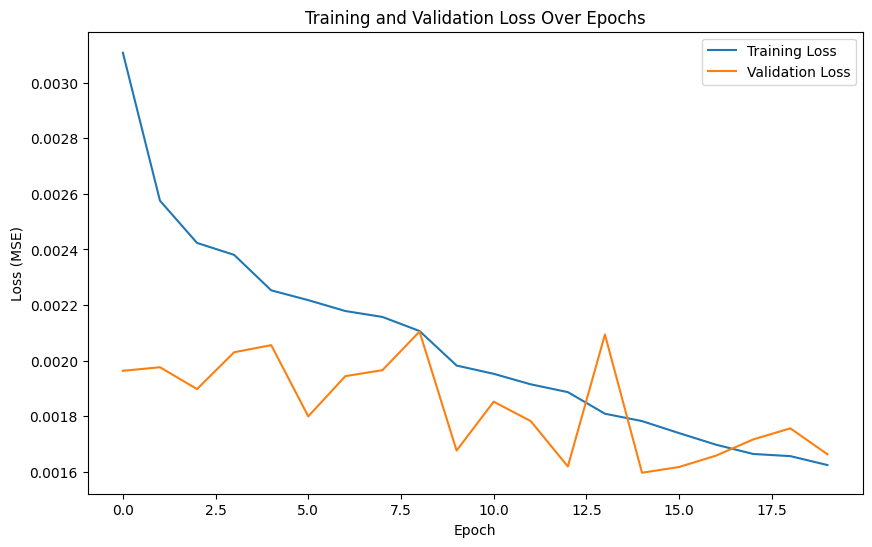

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

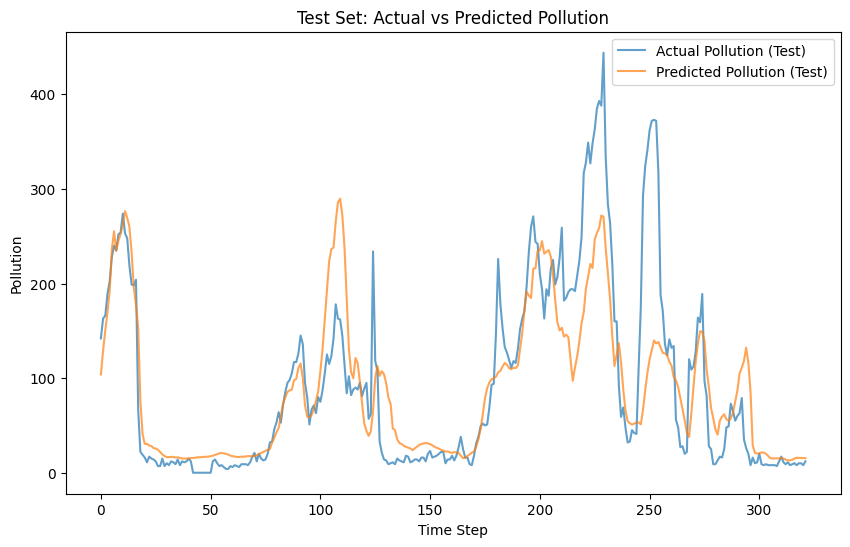

In [78]:
plt.figure(figsize=(10,6))
plt.plot(y_test_true,label='Actual Pollution (Test)',alpha=0.7)
plt.plot(y_test_pred,label='Predicted Pollution (Test)',alpha=0.7)
plt.title('Test Set: Actual vs Predicted Pollution')
plt.xlabel('Time Step')
plt.ylabel('Pollution')
plt.legend()
plt.show()

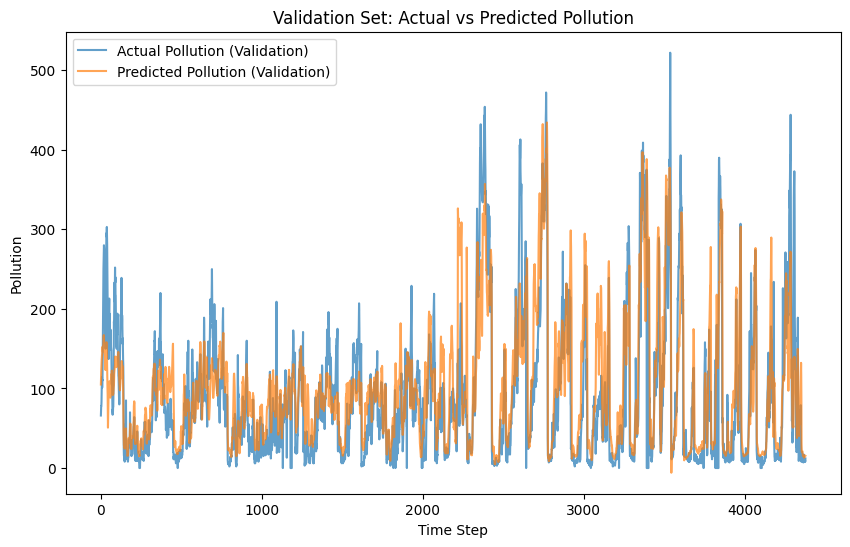

In [79]:
plt.figure(figsize=(10,6))
plt.plot(y_val_true,label='Actual Pollution (Validation)',alpha=0.7)
plt.plot(y_val_pred,label='Predicted Pollution (Validation)',alpha=0.7)
plt.title('Validation Set: Actual vs Predicted Pollution')
plt.xlabel('Time Step')
plt.ylabel('Pollution')
plt.legend()
plt.show()

In [80]:
model.save('model.h5')